# Machine Learning Model for analysing the types of Survivors on the Titanic Ship

In [36]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle

#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
#acquiring the data
titanic_df=pd.read_csv("titanic_train.csv")

In [38]:
#analysing the data
print(titanic_df.columns)

#titanic_df.set_index(["PassengerId"],inplace=True)

#previewing the data
titanic_df.head()

#conclusion:
#categorical data:Survived,Pclass,Sex,Embarked
#continuous  data:PassangerID,Age,SibSP,Fare,Parch

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#previewing the data
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
#checking the structure of the dataset
titanic_df.shape

(891, 12)

In [41]:
#checking for the datatypes of all the fields
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
#extracting the general information from the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
#checking if any null values present in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
#imputer functions(handling null values)
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [45]:
#checking the mode value for the mentioned column
titanic_df['Embarked'].mode()

0    S
dtype: object

In [46]:
#imputer functions(handling null values)
titanic_df['Embarked'].fillna('S',inplace=True)

In [47]:
#verifying the null values status
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

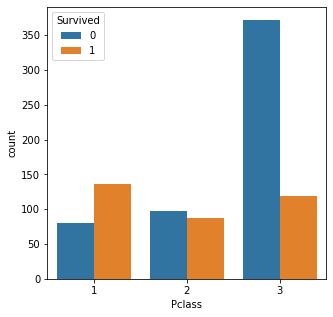

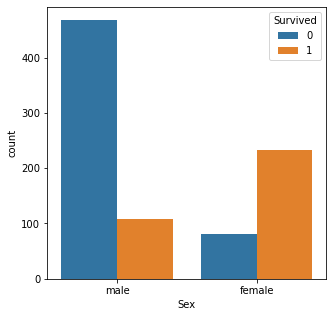

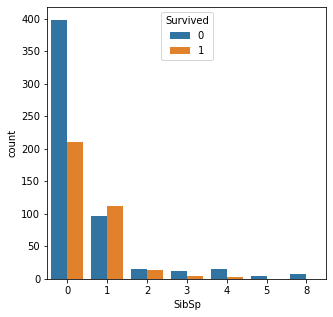

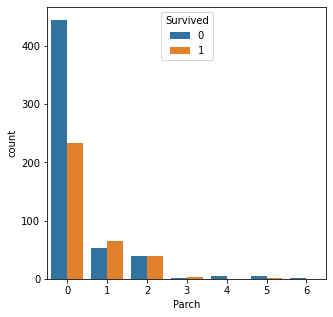

In [48]:
#printing different plot w.r.t survived column
titanic_columns=['Pclass','Sex','SibSp','Parch']
for i in range(len(titanic_columns)):
    fig,ax=plt.subplots(figsize=(5,5))
    sns.countplot(data=titanic_df,x=titanic_columns[i],hue='Survived')

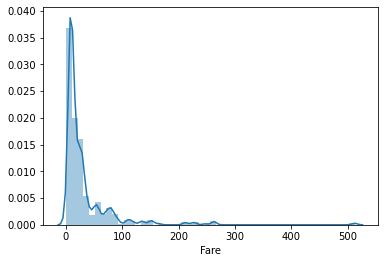

In [49]:
#vizualizing the Fare
sns.distplot(titanic_df['Fare'])

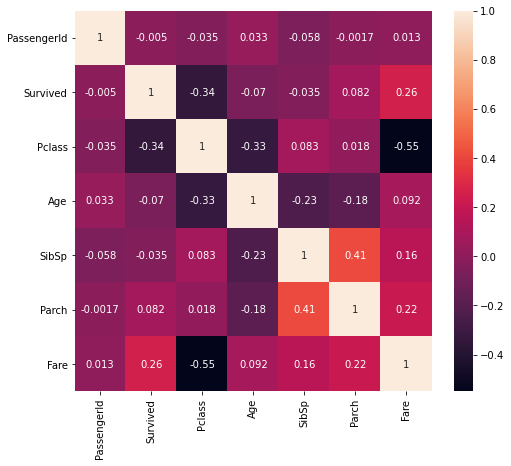

In [50]:
#checking for the correlation
corr_hmap=titanic_df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
#plt.show()

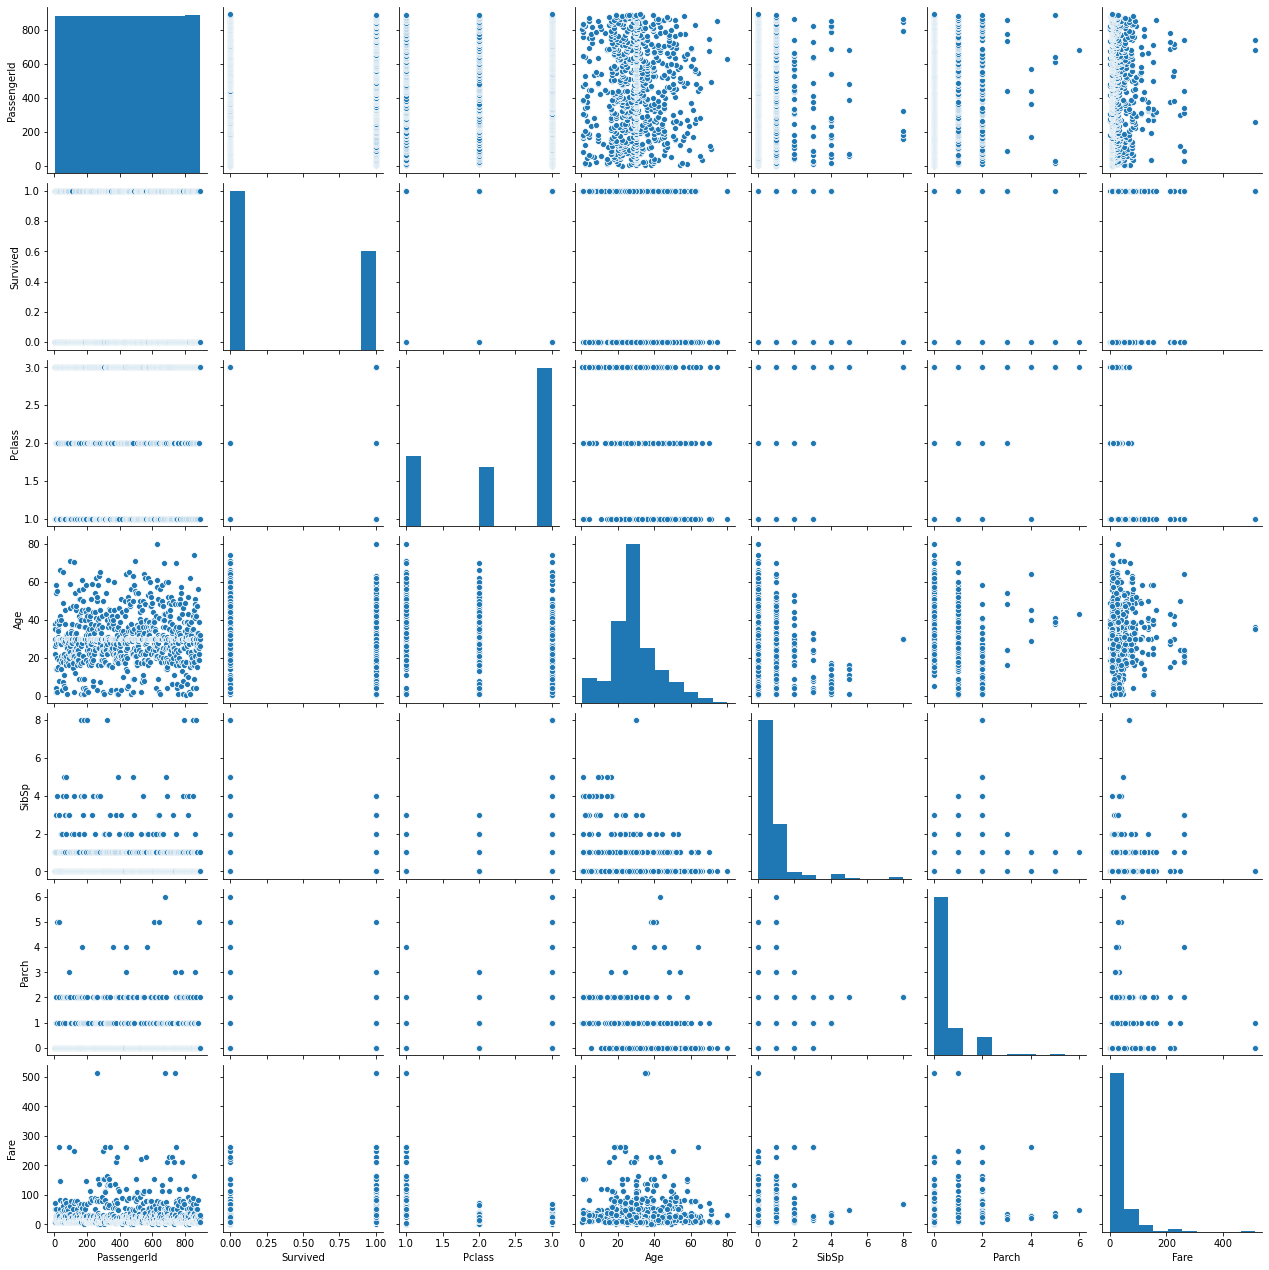

In [51]:
#multiplot visualization
sns.pairplot(titanic_df)

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

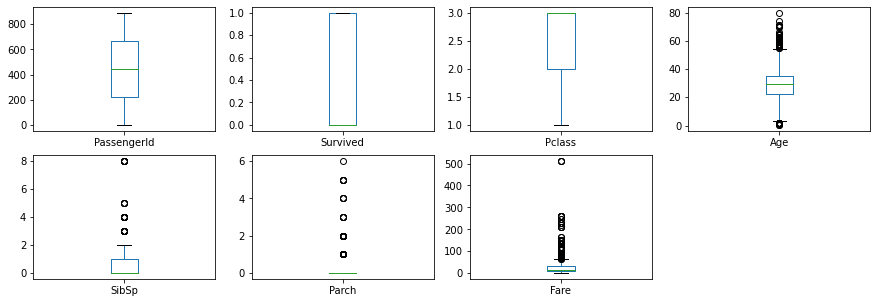

In [52]:
#checking for the outliers
titanic_df.plot(kind='box',subplots=True,layout=(2,4),figsize=(15,5))

In [53]:
#checking the skewness before removing the outliers
titanic_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [54]:
#dropping off the columns those are not required
titanic_df.drop(['PassengerId','Sex','Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
#titanic_df1 = pd.get_dummies(titanic_df)

In [55]:
#removing outliers
z_score=np.abs(zscore(titanic_df))
print(titanic_df.shape)
titanic_df_final=titanic_df.loc[(z_score<3).all(axis=1)]
print(titanic_df_final.shape)

(891, 5)
(839, 5)


In [56]:
#checking the skewness after removing the outliers
titanic_df_final.skew()

Survived    0.417114
Pclass     -0.568482
Age         0.321028
SibSp       2.012240
Parch       2.039356
dtype: float64

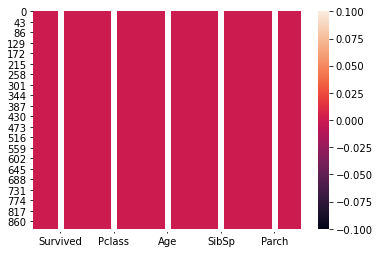

In [57]:
#visualizing the null values through heatmap
sns.heatmap(titanic_df.isnull(),annot=True)

In [58]:
#checking for the statastical report
titanic_df_final.describe()

,Survived,Pclass,Age,SibSp,Parch
count,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.398093,2.281287,29.781311,0.357569,0.269368
std,0.489797,0.840230,12.097224,0.639519,0.581253
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,66.000000,3.000000,2.000000


In [59]:
#Now separating input and output variable
x=titanic_df_final.drop(['Survived'],axis=1)
y=titanic_df_final['Survived']
print(x.shape)
print(y.shape)

(839, 4)
(839,)


In [60]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.85588674, -0.64361481,  1.00515278, -0.46370317],
       [-1.52583457,  0.6797916 ,  1.00515278, -0.46370317],
       [ 0.85588674, -0.31276321, -0.55945424, -0.46370317],
       ...,
       [ 0.85588674, -0.00679846,  1.00515278,  2.97919027],
       [-1.52583457, -0.31276321, -0.55945424, -0.46370317],
       [ 0.85588674,  0.1835142 , -0.55945424, -0.46370317]])

In [61]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [62]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,151):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.6547619047619048
random state:  43  accuracy score:  0.7142857142857143
random state:  44  accuracy score:  0.5952380952380952
random state:  45  accuracy score:  0.7380952380952381
random state:  46  accuracy score:  0.6666666666666666
random state:  47  accuracy score:  0.75
random state:  48  accuracy score:  0.5952380952380952
random state:  49  accuracy score:  0.6428571428571429
random state:  50  accuracy score:  0.7023809523809523
random state:  51  accuracy score:  0.7857142857142857
random state:  52  accuracy score:  0.5952380952380952
random state:  53  accuracy score:  0.7619047619047619
random state:  54  accuracy score:  0.7380952380952381
random state:  55  accuracy score:  0.7023809523809523
random state:  56  accuracy score:  0.5952380952380952
random state:  57  accuracy score:  0.6547619047619048
random state:  58  accuracy score:  0.7142857142857143
random state:  59  accuracy score:  0.75
random state:  60  accuracy score: 

random state:  87  accuracy score:  0.6904761904761905
random state:  88  accuracy score:  0.6666666666666666
random state:  89  accuracy score:  0.6190476190476191
random state:  90  accuracy score:  0.6666666666666666
random state:  91  accuracy score:  0.6428571428571429
random state:  92  accuracy score:  0.6904761904761905
random state:  93  accuracy score:  0.6547619047619048
random state:  94  accuracy score:  0.6785714285714286
random state:  95  accuracy score:  0.6547619047619048
random state:  96  accuracy score:  0.6309523809523809
random state:  97  accuracy score:  0.7619047619047619
random state:  98  accuracy score:  0.7023809523809523
random state:  99  accuracy score:  0.6547619047619048
random state:  100  accuracy score:  0.7142857142857143
random state:  101  accuracy score:  0.6309523809523809
random state:  102  accuracy score:  0.6071428571428571
random state:  103  accuracy score:  0.6785714285714286
random state:  104  accuracy score:  0.7380952380952381
rando

random state:  139  accuracy score:  0.6904761904761905
random state:  140  accuracy score:  0.5238095238095238
random state:  141  accuracy score:  0.7023809523809523
random state:  142  accuracy score:  0.7142857142857143
random state:  143  accuracy score:  0.7261904761904762
random state:  144  accuracy score:  0.6071428571428571
random state:  145  accuracy score:  0.6190476190476191
random state:  146  accuracy score:  0.7380952380952381
random state:  147  accuracy score:  0.7142857142857143
random state:  148  accuracy score:  0.6547619047619048
random state:  149  accuracy score:  0.7023809523809523
random state:  150  accuracy score:  0.7023809523809523

max accuracy score at random state: 69  for the model  DT  is:  0.7619047619047619


GNB
random state:  42  accuracy score:  0.7380952380952381
random state:  43  accuracy score:  0.7142857142857143
random state:  44  accuracy score:  0.6190476190476191
random state:  45  accuracy score:  0.7023809523809523
random state:  46 

random state:  70  accuracy score:  0.7142857142857143
random state:  71  accuracy score:  0.6904761904761905
random state:  72  accuracy score:  0.6904761904761905
random state:  73  accuracy score:  0.7261904761904762
random state:  74  accuracy score:  0.7380952380952381
random state:  75  accuracy score:  0.6428571428571429
random state:  76  accuracy score:  0.6904761904761905
random state:  77  accuracy score:  0.7142857142857143
random state:  78  accuracy score:  0.7619047619047619
random state:  79  accuracy score:  0.7023809523809523
random state:  80  accuracy score:  0.7619047619047619
random state:  81  accuracy score:  0.6904761904761905
random state:  82  accuracy score:  0.7023809523809523
random state:  83  accuracy score:  0.6547619047619048
random state:  84  accuracy score:  0.75
random state:  85  accuracy score:  0.7380952380952381
random state:  86  accuracy score:  0.6428571428571429
random state:  87  accuracy score:  0.6547619047619048
random state:  88  accur

In [63]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.6862483660130718
Cross Validation Score(Std):  0.08300624363079608

Model name:  KNN
Cross Validation Score(Mean):  0.6767058823529412
Cross Validation Score(Std):  0.07551082648241855

Model name:  DT
Cross Validation Score(Mean):  0.65040522875817
Cross Validation Score(Std):  0.059741485319133016

Model name:  GNB
Cross Validation Score(Mean):  0.6806535947712418
Cross Validation Score(Std):  0.0877500284638572

Model name:  SVC
Cross Validation Score(Mean):  0.6979869281045752
Cross Validation Score(Std):  0.07124327395550653



In [64]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression())",82.142857,68.624837
1,"(KNN, KNeighborsClassifier())",79.761905,67.670588
2,"(DT, DecisionTreeClassifier())",76.190476,65.040523
3,"(GNB, GaussianNB())",82.142857,68.065359
4,"(SVC, SVC())",82.142857,69.798693


In [65]:
# Boosting methods
boosters=[]
boosters.append(('AB', AdaBoostClassifier()))
boosters.append(('GBM', GradientBoostingClassifier()))
boosters.append(('RF', RandomForestClassifier()))
boosters.append(('ET', ExtraTreesClassifier()))

In [66]:
results = []
names = []
for name, model in boosters:
    cv_results = cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_results)
    names.append(name)    
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_results.mean())
    print("Cross Validation Score(Std): ",cv_results.std())
    print()

Model name:  AB
Cross Validation Score(Mean):  0.6940915032679736
Cross Validation Score(Std):  0.062073607328147415

Model name:  GBM
Cross Validation Score(Mean):  0.6968627450980391
Cross Validation Score(Std):  0.05226260841528921

Model name:  RF
Cross Validation Score(Mean):  0.6636078431372548
Cross Validation Score(Std):  0.057601102129658285

Model name:  ET
Cross Validation Score(Mean):  0.6663529411764705
Cross Validation Score(Std):  0.051084699727023716



In [67]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=104,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.8214285714285714
confusion matrix: 
[[53  5]
 [10 16]]
classification report: 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        58
           1       0.76      0.62      0.68        26

    accuracy                           0.82        84
   macro avg       0.80      0.76      0.78        84
weighted avg       0.82      0.82      0.82        84

[0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0]


In [68]:
#saving the model as pickle in a file
pickle.dump(model_name,open('svc_titanic_data.pkl','wb'))

In [69]:
#loading the model for testing
loaded_model=pickle.load(open('svc_titanic_data.pkl','rb'))
loaded_model.predict(x_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)